# Assignment 03
Generate Girvan-Newman (GN) networks varying:
- $z_{in}, z_{out}$ or the probabilities matrix
- communities number
- communities size/proportion

Discuss the properties of networks spectrum. Compare it with random networks without communities (ER)

In [165]:
import igraph as ig
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%config Completer.use_jedi = False

To generate a SBM network we need to define the preference matrix. Which is a $K \times K$ matrix, where $K$ is the number of groups. The probability of creating an edge between vertices from groups $i$ and $j$ is given by element $(i,j)$. In our case, $K = 2$. 

Also, $p_{0,0}$ is the probability of one member of group 0 connect to a node of group 0. This is analogue for $p_{1,1}$. $p_{0,1}$ represents the probability of a connection from a vertice from group 0 to a vertice in group 1.

$$
\begin{bmatrix}
p_{0,0}, p_{0,1} \\
p_{1, 0}, p_{1,1}
\end{bmatrix}
$$

## Experiment methodology
We will create several networks and analyze their communities. We fixed the sum $z_{in} + z_{out}$ and changed the values for each $z$.

Also we varied the proportion of nodes within the communities. Each community will have 20%, 50% and 80% of the nodes. 

Finally, we repeated the experiment for 2, 3 and 4 communities.

In [129]:
z_max = 5
z_in_values = np.arange(1, z_max, 1)
z_out_values = [z_max - i for i in z_in_values]
community_proportion = [0.2, 0.5, 0.8]

In [155]:
from itertools import product

prod = product(*[z_in_values, z_out_values, community_proportion])

for z_in, z_out, p in prod:
    pass

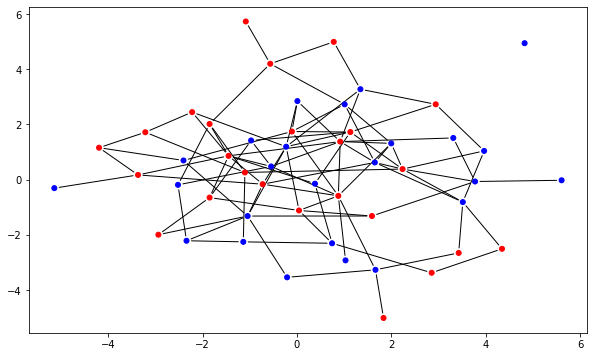

In [202]:
idx = 1
z_in = z_in_values[idx]
z_out = z_out_values[idx]
n = 50
block_sizes = [int(community_proportion[idx]*n), 
               # workaround to precision float issues
               int(np.round(1 - community_proportion[idx], 2)*n)]
pm = [[z_in/block_sizes[0], z_out/n],
      [z_out/n, z_in/block_sizes[1]],
     ]

sample_graph = ig.Graph.SBM(n = n, pref_matrix = pm, block_sizes = block_sizes, directed=False, loops=False)

fig, ax = plt.subplots(figsize = (10, 6))
ig.plot(sample_graph, 
        target = ax,
       vertex_color = block_sizes[0] * ["blue"] + block_sizes[1] * ["red"] )

In [203]:
sample_graph.modularity(block_sizes[0] * [0] + block_sizes[1] * [1])

0.0025436466643541933

In [204]:
laplacian_matrix = ig.Graph.laplacian(sample_graph)

In [205]:
from numpy import linalg

eigenvalues, eigenvectors = linalg.eig(laplacian_matrix)

In [206]:
spectral_analysis = pd.DataFrame({"node": [i for i in range(n)],"eigenvalues": eigenvalues})

In [207]:
np.round(eigenvalues, 2)

array([10.51,  9.51,  9.1 ,  8.71,  8.51,  8.24,  7.14,  6.79,  6.41,
        5.85,  5.69,  5.6 ,  5.44,  5.35,  5.05,  4.95,  4.8 ,  4.64,
        4.55,  4.39,  4.16,  0.  ,  3.72,  3.65,  3.43,  3.27,  3.07,
        2.85,  2.78,  0.46,  0.52,  0.54,  0.6 ,  0.74,  0.85,  2.56,
        0.98,  2.3 ,  2.26,  2.1 ,  1.16,  1.25,  1.32,  1.46,  1.51,
        1.96,  1.81,  1.74,  1.71,  0.  ])

In [211]:
df_plot = spectral_analysis.sort_values(by = ["eigenvalues"])

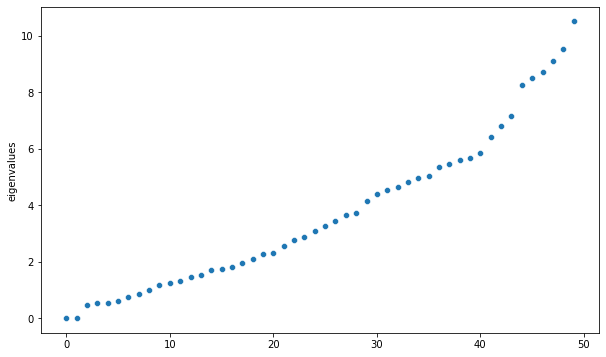

In [214]:
fig, ax = plt.subplots(figsize = (10, 6))


_ = sns.scatterplot(x = [i for i in range(df_plot.shape[0])],
               y = df_plot["eigenvalues"])